# SAD2 2022/2023 Project 1

In [1]:
import scanpy as sc
import numpy as np
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import torch.nn as nn
import seaborn as sns

torch.manual_seed(42)

## 1. Exploration

### a)

In [2]:
train_path = 'data/SAD2022Z_Project1_GEX_train.h5ad'
test_path = 'data/SAD2022Z_Project1_GEX_test.h5ad'
train_adata = sc.read_h5ad(train_path)
test_adata = sc.read_h5ad(test_path)

In [156]:
print(train_adata)
print(test_adata)

AnnData object with n_obs × n_vars = 72208 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'is_train'
    var: 'feature_types', 'gene_id', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    layers: 'counts'
AnnData object with n_obs × n_vars = 18052 × 5000
    obs: 'GEX_n_genes_by_counts', 'GEX_pct_counts_mt', 'GEX_size_factors', 'GEX_phase', 'ADT_n_antibodies_by_counts', 'ADT_total_counts', 'ADT_iso_count', 'cell_type', 'batch', 'ADT_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'Donor

### b)

In [157]:
preprocessed = train_adata.X
raw = train_adata.layers['counts']

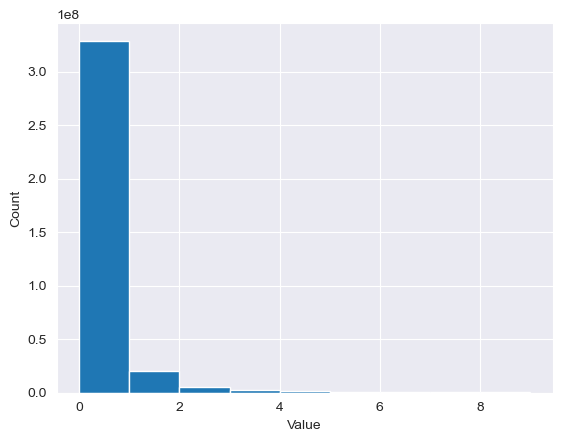

In [71]:
bins = np.arange(0, 10, 1)
counts, bins = np.histogram(raw.toarray(), bins=bins)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('Plots/histogram_raw_full.pdf')

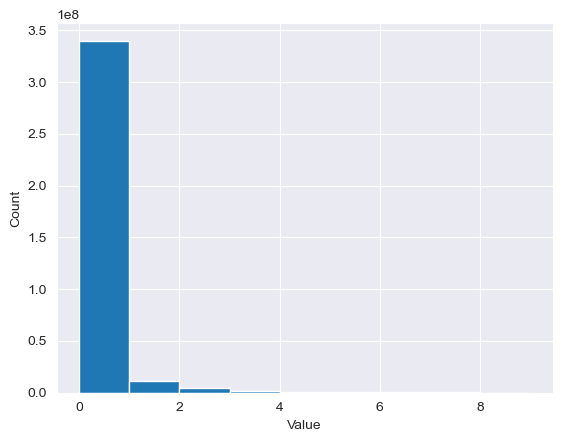

In [72]:
bins = np.arange(0, 10, 1)
counts, bins = np.histogram(preprocessed.toarray(), bins=bins)
plt.hist(bins[:-1], bins, weights=counts)
plt.xlabel('Value')
plt.ylabel('Count')
plt.savefig('Plots/histogram_preprocessed_full.pdf')

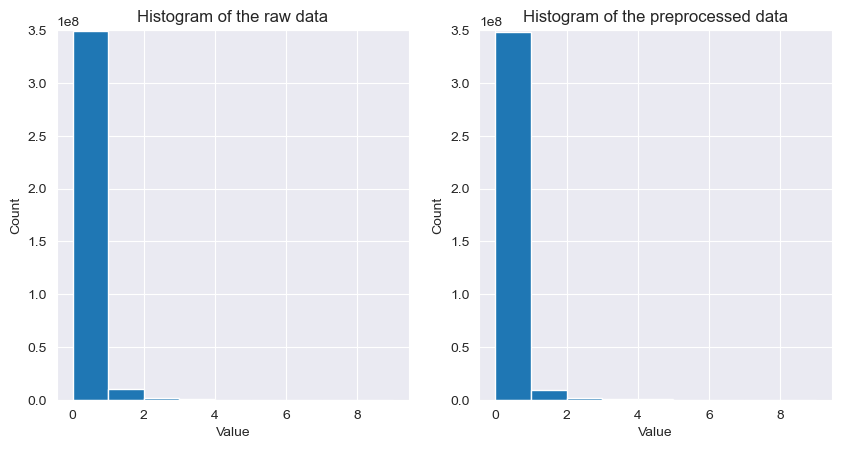

In [159]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
bins = np.arange(0, 10, 1)

counts, bins = np.histogram(raw.toarray(), bins=bins)
ax1.set_ylim([0, 3.5e8])
ax1.hist(bins[:-1], bins, weights=counts)
ax1.set_title('Histogram of the raw data')
ax1.set(xlabel='Value', ylabel='Count')

counts, bins = np.histogram(preprocessed.toarray(), bins=bins)
ax2.set_ylim([0, 3.5e8])
ax2.hist(bins[:-1], bins, weights=counts)
ax2.set_title('Histogram of the preprocessed data')
ax2.set(xlabel='Value', ylabel='Count')

plt.savefig('Plots/histogram_full.pdf')

### c)

Each row in the preprocessed data corresponds to the same row in raw data multiplied by constant number


In [26]:
for i in range(10):
    print((raw[i].data / preprocessed[i].data)[1])

1.3710968
2.4261494
0.85490817
1.3874747
0.52090335
0.49683255
0.48971236
0.96022487
0.30575007
1.2538954


### d)

In [73]:
preprocessed_nz = preprocessed.toarray()[preprocessed.toarray() != 0]
raw_nz = raw.toarray()[raw.toarray() != 0]

(array([       0., 20125032.,  5309967.,  2177194.,  1156725.,   709918.,
          480522.,   344392.,   259395.,   202080.,   161591.,   132435.,
          110468.,   172468.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <BarContainer object of 14 artists>)

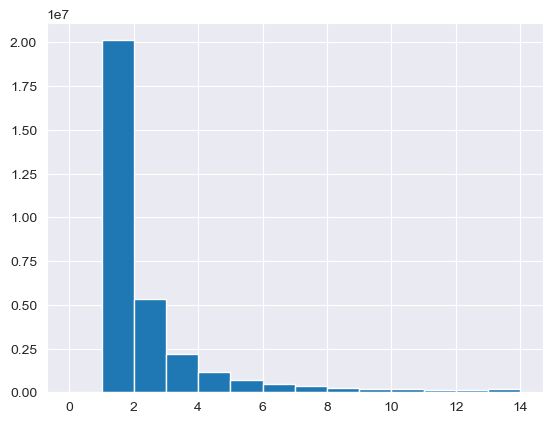

In [74]:
bins = np.arange(0, 15, 1)
counts, bins = np.histogram(raw_nz, bins=bins)
plt.hist(bins[:-1], bins, weights=counts)

(array([11115064., 10944372.,  4105617.,  1694707.,   921703.,   567638.,
          383479.,   280843.,   214593.,   169366.,   138907.,   117128.,
          101397.,    87614.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <BarContainer object of 14 artists>)

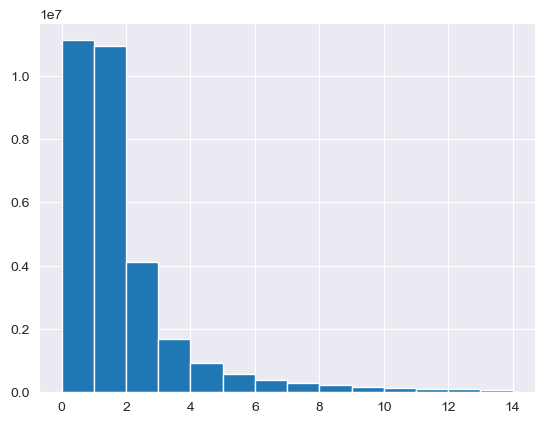

In [29]:
bins = np.arange(0, 15, 1)
counts, bins = np.histogram(preprocessed_nz, bins=bins)
plt.hist(bins[:-1], bins, weights=counts)

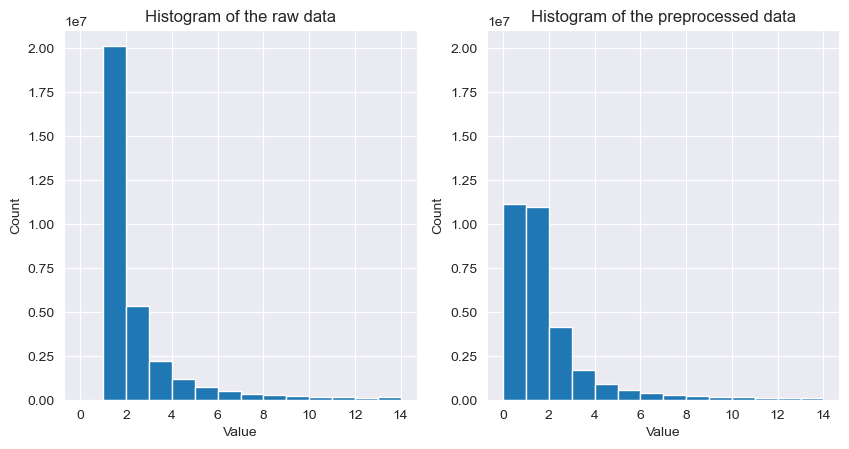

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
bins = np.arange(0, 15, 1)

counts, bins = np.histogram(raw_nz, bins=bins)
ax1.set_ylim([0, 2.1e7])
ax1.hist(bins[:-1], bins, weights=counts)
ax1.set_title('Histogram of the raw data')
ax1.set(xlabel='Value', ylabel='Count')

counts, bins = np.histogram(preprocessed_nz, bins=bins)
ax2.set_ylim([0, 2.1e7])
ax2.hist(bins[:-1], bins, weights=counts)
ax2.set_title('Histogram of the preprocessed data')
ax2.set(xlabel='Value', ylabel='Count')

plt.savefig('Plots/histogram_no_zeros.pdf')

### e)

### f)

In [84]:
train_adata.obs["cell_type"]

AGTTCCCAGCACCTGC-1-s3d1             CD14+ Mono
CAGATTGCAAAGGCAC-1-s2d1           Erythroblast
GTCATGACAATTTCCT-1-s1d2    Naive CD20+ B IGKC+
TCATCCGCACTTGGCG-1-s2d5             CD14+ Mono
AGTGCCGGTCATCAGT-1-s2d5                     NK
                                  ...         
AGTCATGAGGTTTACC-1-s3d7             CD14+ Mono
GTGAGCCTCGCAGATT-1-s2d1             Lymph prog
GTCATTTTCCATTGCC-1-s2d1           Erythroblast
CGCATGGAGAACCCGA-1-s1d1           Reticulocyte
TGGGAGATCCTCTGCA-1-s4d1         Transitional B
Name: cell_type, Length: 72208, dtype: category
Categories (45, object): ['B1 B IGKC+', 'B1 B IGKC-', 'CD4+ T CD314+ CD45RA+', 'CD4+ T activated', ..., 'dnT', 'gdT CD158b+', 'gdT TCRVD2+', 'pDC']

# Vanilla VAE training

In [79]:
class Decoder(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, h_dim3, z_dim):
        super(Decoder, self).__init__()
        self.lin5 = nn.Linear(z_dim, h_dim3)
        self.batch_norm5 = nn.BatchNorm1d(h_dim3)
        self.drop5 = nn.Dropout()
        self.lin6 = nn.Linear(h_dim3, h_dim2)
        self.drop6 = nn.Dropout()
        self.batch_norm6 = nn.BatchNorm1d(h_dim2)
        self.lin7 = nn.Linear(h_dim2, h_dim1)
        self.drop7 = nn.Dropout()
        self.batch_norm7 = nn.BatchNorm1d(h_dim1)
        self.lin8 = nn.Linear(h_dim1, x_dim)

    @staticmethod
    def log_prob(x, p):
        dist = torch.distributions.Normal(p, 1)
        log_prob_tensor = dist.log_prob(x)
        log_prob_sum = torch.sum(log_prob_tensor)
        return log_prob_sum

    def forward(self, z):
        h = self.drop5(self.batch_norm5(self.lin5(z)))
        h = nn.functional.relu(h)
        h = self.drop6(self.batch_norm6(self.lin6(h)))
        h = nn.functional.relu(h)
        h = self.drop7(self.batch_norm7(self.lin7(h)))
        h = nn.functional.relu(h)
        return nn.functional.relu(self.lin8(h))

In [80]:
class Encoder(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, h_dim3, z_dim):
        super(Encoder, self).__init__()
        self.lin1 = nn.Linear(x_dim, h_dim1)
        self.batch_norm1 = nn.BatchNorm1d(h_dim1)
        self.drop1 = nn.Dropout()
        self.lin2 = nn.Linear(h_dim1, h_dim2)
        self.batch_norm2 = nn.BatchNorm1d(h_dim2)
        self.drop2 = nn.Dropout()
        self.lin3 = nn.Linear(h_dim2, h_dim3)
        self.batch_norm3 = nn.BatchNorm1d(h_dim3)
        self.drop3 = nn.Dropout()
        self.lin41 = nn.Linear(h_dim3, z_dim)  # mu
        self.lin42 = nn.Linear(h_dim3, z_dim)  # var

    def forward(self, x):
        x = self.drop1(self.batch_norm1(self.lin1(x)))
        x  = nn.functional.relu(x)
        x = self.drop2(self.batch_norm2(self.lin2(x)))
        x = nn.functional.relu(x)
        x = self.drop3(self.batch_norm3(self.lin3(x)))
        x = nn.functional.relu(x)
        mu = self.lin41(x)
        var = nn.functional.softplus(self.lin42(x)) + 1e-4
        return mu, var

In [112]:
class VAE(nn.Module):
    def __init__(self, encoder, decoder):
        super(VAE, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    @staticmethod
    def sampling(mu, var):
        eps = torch.randn_like(var)
        return eps * var + mu

    #@staticmethod
    #def kl_div(mu, sigma):
    #    return 0.5*torch.sum((torch.sum(sigma.pow(2),dim=1)+torch.sum(mu.pow(2),dim=1)-torch.sum(torch.log(sigma.pow(2)),dim=1)-1))

    @staticmethod
    def kl_div(mu, sigma):
        dist1 = torch.distributions.Normal(mu, sigma)
        dist2 = torch.distributions.Normal(torch.zeros_like(mu), 1)
        return torch.sum(torch.distributions.kl.kl_divergence(dist1, dist2))

    def loss_function(self, data, beta):
        p, mu, var = self.forward(data)
        kl_loss = beta * self.kl_div(mu, var)
        recon_loss = -self.decoder.log_prob(data, p)
        return recon_loss + kl_loss, kl_loss, recon_loss

    def generate(self, z):
        with torch.no_grad():
            return self.decoder(z)

    def calc_latent(self, x):
        with torch.no_grad():
            mu, var = self.encoder(x)
            return self.sampling(mu, var)

    def forward(self, x):
        mu, var = self.encoder(x)
        z = self.sampling(mu, var)
        mu_d = self.decoder(z)
        return mu_d, mu, var


In [82]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

X_test = torch.Tensor(test_adata.layers['counts'].toarray()).to(device)
X_train = torch.Tensor(train_adata.layers['counts'].toarray()).to(device)

In [83]:
def train(data, model, batch_size, beta):
    vae.train()
    permutation = torch.randperm(data.size()[0])
    train_loss = 0
    train_kl_loss = 0
    train_recon_loss = 0
    for i in tqdm(range(0, data.size()[0], batch_size)):
        optimizer.zero_grad()
        indices = permutation[i:i+batch_size]
        mini_batch = data[indices]
        loss, kl_loss, recon_loss = model.loss_function(mini_batch, beta)
        loss.backward()
        train_loss += loss.item()
        train_kl_loss += kl_loss.item()
        train_recon_loss += recon_loss.item()
        optimizer.step()
    train_loss /= data.size()[0]
    train_kl_loss /= data.size()[0]
    train_recon_loss /= data.size()[0]
    print(f'====> Epoch: {epoch} Average train loss: {train_loss}')
    return train_loss, train_kl_loss, train_recon_loss

In [84]:
def test(data, model, beta):
    vae.eval()
    with torch.no_grad():
        test_loss, test_kl_loss, test_recon_loss = model.loss_function(data, beta)
    test_loss /= data.size()[0]
    test_kl_loss /= data.size()[0]
    test_recon_loss /= data.size()[0]
    print(f'====> Epoch: {epoch} Average test loss: {test_loss}')
    return test_loss.item(), test_kl_loss.item(), test_recon_loss.item()

In [123]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")

X_test = torch.Tensor(test_adata.layers['counts'].toarray()).to(device)
X_train = torch.Tensor(train_adata.layers['counts'].toarray()).to(device)

n_epochs = 50 # or whatever
batch_size = 512 # or whatever
beta = 1

encoder = Encoder(5000, 2000, 1500, 1000, 5).to(device)
decoder = Decoder(5000, 2000, 1500, 1000, 5).to(device)
vae = VAE(encoder, decoder).to(device)

optimizer = torch.optim.Adam(params=vae.parameters())
train_loss_list = []
train_kl_loss_list = []
train_recon_loss_list = []
test_loss_list = []
test_kl_loss_list = []
test_recon_loss_list = []

for epoch in range(n_epochs):
    train_loss, train_kl_loss, train_recon_loss = train(X_train, vae, batch_size, beta)
    train_loss_list.append(train_loss)
    train_kl_loss_list.append(train_kl_loss)
    train_recon_loss_list.append(train_recon_loss)
    test_loss, test_kl_loss, test_recon_loss = test(X_test, vae, beta)
    test_loss_list.append(test_loss)
    test_kl_loss_list.append(test_kl_loss)
    test_recon_loss_list.append(test_recon_loss)


100%|██████████| 142/142 [00:10<00:00, 13.58it/s]


====> Epoch: 0 Average train loss: 2555757.7913804566
====> Epoch: 0 Average test loss: 1905118.375


100%|██████████| 142/142 [00:10<00:00, 13.39it/s]


====> Epoch: 1 Average train loss: 1650472.1515898516
====> Epoch: 1 Average test loss: 1130243.875


100%|██████████| 142/142 [00:10<00:00, 13.66it/s]


====> Epoch: 2 Average train loss: 918518.3777940117
====> Epoch: 2 Average test loss: 533827.0625


100%|██████████| 142/142 [00:10<00:00, 13.36it/s]


====> Epoch: 3 Average train loss: 472248.6229503656
====> Epoch: 3 Average test loss: 215567.96875


100%|██████████| 142/142 [00:10<00:00, 13.59it/s]


====> Epoch: 4 Average train loss: 291721.0515316862
====> Epoch: 4 Average test loss: 178928.359375


100%|██████████| 142/142 [00:10<00:00, 13.80it/s]


====> Epoch: 5 Average train loss: 228480.44910363117
====> Epoch: 5 Average test loss: 174649.578125


100%|██████████| 142/142 [00:10<00:00, 13.69it/s]


====> Epoch: 6 Average train loss: 202538.6569355196
====> Epoch: 6 Average test loss: 181306.328125


100%|██████████| 142/142 [00:10<00:00, 14.03it/s]


====> Epoch: 7 Average train loss: 189106.78124307556
====> Epoch: 7 Average test loss: 138719.515625


100%|██████████| 142/142 [00:10<00:00, 14.15it/s]


====> Epoch: 8 Average train loss: 176472.0080877465
====> Epoch: 8 Average test loss: 125090.7578125


100%|██████████| 142/142 [00:10<00:00, 14.13it/s]


====> Epoch: 9 Average train loss: 163125.96675576112
====> Epoch: 9 Average test loss: 114768.1171875


100%|██████████| 142/142 [00:10<00:00, 14.03it/s]


====> Epoch: 10 Average train loss: 152084.97487812984
====> Epoch: 10 Average test loss: 112108.7421875


100%|██████████| 142/142 [00:10<00:00, 13.91it/s]


====> Epoch: 11 Average train loss: 150286.2389762907
====> Epoch: 11 Average test loss: 103024.9140625


100%|██████████| 142/142 [00:09<00:00, 14.23it/s]


====> Epoch: 12 Average train loss: 139293.0141535564
====> Epoch: 12 Average test loss: 118682.609375


100%|██████████| 142/142 [00:10<00:00, 13.98it/s]


====> Epoch: 13 Average train loss: 140826.12695269223
====> Epoch: 13 Average test loss: 107130.1796875


100%|██████████| 142/142 [00:10<00:00, 13.95it/s]


====> Epoch: 14 Average train loss: 138478.52402780854
====> Epoch: 14 Average test loss: 101738.5078125


100%|██████████| 142/142 [00:10<00:00, 13.86it/s]


====> Epoch: 15 Average train loss: 130780.07447928208
====> Epoch: 15 Average test loss: 121023.9609375


100%|██████████| 142/142 [00:09<00:00, 14.44it/s]


====> Epoch: 16 Average train loss: 133486.7740139597
====> Epoch: 16 Average test loss: 91320.5859375


100%|██████████| 142/142 [00:09<00:00, 14.24it/s]


====> Epoch: 17 Average train loss: 128933.1417017505
====> Epoch: 17 Average test loss: 83012.8984375


100%|██████████| 142/142 [00:10<00:00, 13.81it/s]


====> Epoch: 18 Average train loss: 123708.96886771549
====> Epoch: 18 Average test loss: 81135.5859375


100%|██████████| 142/142 [00:10<00:00, 13.94it/s]


====> Epoch: 19 Average train loss: 115804.57230673886
====> Epoch: 19 Average test loss: 67018.4921875


100%|██████████| 142/142 [00:10<00:00, 13.86it/s]


====> Epoch: 20 Average train loss: 116989.79298692665
====> Epoch: 20 Average test loss: 67485.6875


100%|██████████| 142/142 [00:10<00:00, 14.14it/s]


====> Epoch: 21 Average train loss: 110819.37290881897
====> Epoch: 21 Average test loss: 62905.5078125


100%|██████████| 142/142 [00:09<00:00, 14.36it/s]


====> Epoch: 22 Average train loss: 100403.70087801905
====> Epoch: 22 Average test loss: 63150.59375


100%|██████████| 142/142 [00:09<00:00, 14.31it/s]


====> Epoch: 23 Average train loss: 114026.35609627742
====> Epoch: 23 Average test loss: 56295.30859375


100%|██████████| 142/142 [00:09<00:00, 14.26it/s]


====> Epoch: 24 Average train loss: 103293.03942776423
====> Epoch: 24 Average test loss: 60046.8046875


100%|██████████| 142/142 [00:09<00:00, 14.26it/s]


====> Epoch: 25 Average train loss: 104632.09896583481
====> Epoch: 25 Average test loss: 80627.328125


100%|██████████| 142/142 [00:10<00:00, 14.15it/s]


====> Epoch: 26 Average train loss: 104019.58733104366
====> Epoch: 26 Average test loss: 55666.20703125


100%|██████████| 142/142 [00:10<00:00, 13.56it/s]


====> Epoch: 27 Average train loss: 100048.34843784622
====> Epoch: 27 Average test loss: 60955.84765625


100%|██████████| 142/142 [00:10<00:00, 14.09it/s]


====> Epoch: 28 Average train loss: 104928.298651119
====> Epoch: 28 Average test loss: 50606.875


100%|██████████| 142/142 [00:09<00:00, 14.24it/s]


====> Epoch: 29 Average train loss: 94670.26409816087
====> Epoch: 29 Average test loss: 56093.05078125


100%|██████████| 142/142 [00:09<00:00, 14.23it/s]


====> Epoch: 30 Average train loss: 98109.84253822292
====> Epoch: 30 Average test loss: 53548.85546875


100%|██████████| 142/142 [00:09<00:00, 14.25it/s]


====> Epoch: 31 Average train loss: 93523.21410370042
====> Epoch: 31 Average test loss: 51669.19921875


100%|██████████| 142/142 [00:10<00:00, 13.45it/s]


====> Epoch: 32 Average train loss: 88121.02260137381
====> Epoch: 32 Average test loss: 61070.1484375


100%|██████████| 142/142 [00:10<00:00, 13.54it/s]


====> Epoch: 33 Average train loss: 95579.96116427543
====> Epoch: 33 Average test loss: 52781.9921875


100%|██████████| 142/142 [00:11<00:00, 12.17it/s]


====> Epoch: 34 Average train loss: 93270.70188898737
====> Epoch: 34 Average test loss: 92434.2109375


100%|██████████| 142/142 [00:12<00:00, 11.21it/s]


====> Epoch: 35 Average train loss: 86522.58245623753
====> Epoch: 35 Average test loss: 68184.96875


100%|██████████| 142/142 [00:14<00:00, 10.10it/s]


====> Epoch: 36 Average train loss: 92590.10354808331
====> Epoch: 36 Average test loss: 62136.34375


100%|██████████| 142/142 [00:14<00:00, 10.13it/s]


====> Epoch: 37 Average train loss: 88831.9210198316
====> Epoch: 37 Average test loss: 72931.296875


100%|██████████| 142/142 [00:13<00:00, 10.39it/s]


====> Epoch: 38 Average train loss: 92484.96562015289
====> Epoch: 38 Average test loss: 63334.625


100%|██████████| 142/142 [00:13<00:00, 10.53it/s]


====> Epoch: 39 Average train loss: 81685.64088466651
====> Epoch: 39 Average test loss: 61514.2109375


100%|██████████| 142/142 [00:13<00:00, 10.26it/s]


====> Epoch: 40 Average train loss: 81244.38041491248
====> Epoch: 40 Average test loss: 56237.96875


100%|██████████| 142/142 [00:14<00:00,  9.83it/s]


====> Epoch: 41 Average train loss: 85648.35454520275
====> Epoch: 41 Average test loss: 156808.328125


100%|██████████| 142/142 [00:15<00:00,  9.13it/s]


====> Epoch: 42 Average train loss: 83116.47354863727
====> Epoch: 42 Average test loss: 44774.01953125


100%|██████████| 142/142 [00:12<00:00, 11.66it/s]


====> Epoch: 43 Average train loss: 83450.66579880346
====> Epoch: 43 Average test loss: 47199.81640625


100%|██████████| 142/142 [00:11<00:00, 12.73it/s]


====> Epoch: 44 Average train loss: 84355.55306891204
====> Epoch: 44 Average test loss: 128609.8515625


100%|██████████| 142/142 [00:10<00:00, 13.12it/s]


====> Epoch: 45 Average train loss: 85161.59933802349
====> Epoch: 45 Average test loss: 173871.375


100%|██████████| 142/142 [00:11<00:00, 12.60it/s]


====> Epoch: 46 Average train loss: 79893.26958231775
====> Epoch: 46 Average test loss: 61827.13671875


100%|██████████| 142/142 [00:11<00:00, 12.85it/s]


====> Epoch: 47 Average train loss: 75383.15535674717
====> Epoch: 47 Average test loss: 45311.55859375


100%|██████████| 142/142 [00:11<00:00, 12.87it/s]


====> Epoch: 48 Average train loss: 77366.15289164636
====> Epoch: 48 Average test loss: 55575.99609375


100%|██████████| 142/142 [00:11<00:00, 12.44it/s]


====> Epoch: 49 Average train loss: 72452.21341125637
====> Epoch: 49 Average test loss: 45135.953125


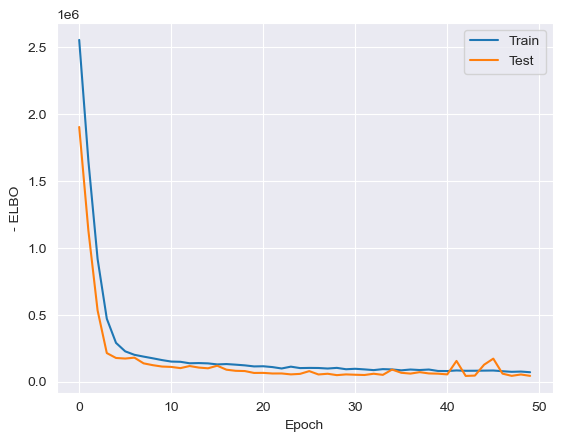

In [124]:
plt.plot(train_loss_list, label='Train')
plt.plot(test_loss_list, label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('- ELBO')
plt.savefig("Plots/VanillaVAE_5.pdf")

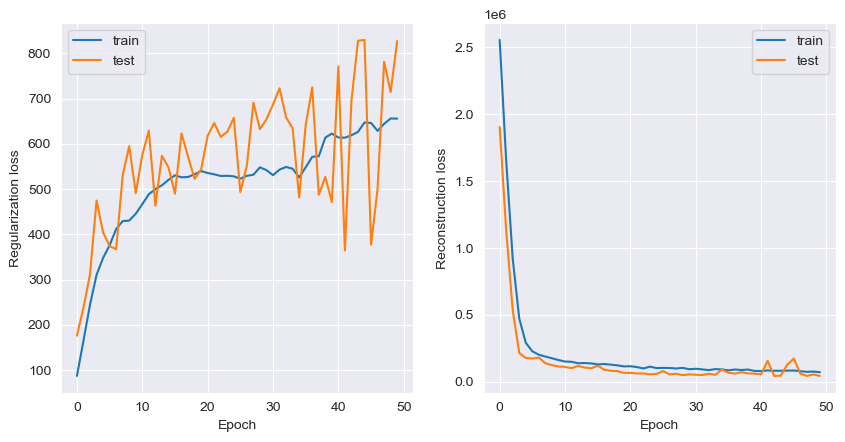

In [125]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(10)
ax1.plot(train_kl_loss_list, label='train')
ax1.plot(test_kl_loss_list, label='test')
ax1.set(xlabel='Epoch', ylabel='Regularization loss')
ax1.legend()

ax2.plot(train_recon_loss_list, label='train')
ax2.plot(test_recon_loss_list, label='test')
ax2.set(xlabel='Epoch', ylabel='Reconstruction loss')
ax2.legend()

plt.savefig('Plots/VanillaVAE_5_both.pdf')

6
[0.44754491 0.20275532 0.11579785 0.07565453 0.06504242 0.04961979
 0.02155728 0.00989487 0.00703397 0.00509905]


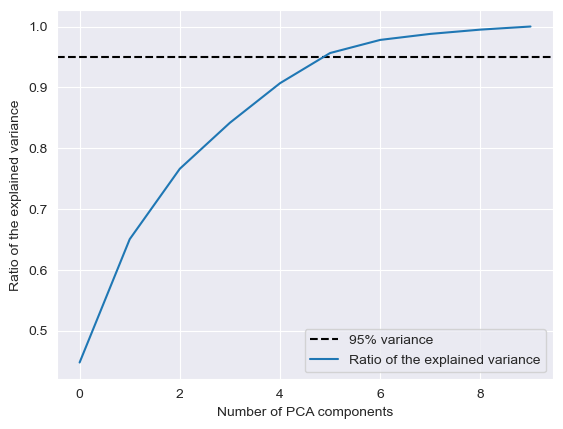

In [159]:
from sklearn.decomposition import PCA
z = vae.calc_latent(X_test)
pca = PCA()
pca.fit(z.cpu())
variance = pca.explained_variance_ratio_
combined_variance = np.zeros_like(variance)
combined_variance[0] = variance[0]
to_print = True
for i in range(1, len(variance)):
    combined_variance[i] = combined_variance[i-1] + variance[i]

    if combined_variance[i] >= 0.95 and to_print:
        print(i + 1)
        to_print = False

print(variance)

plt.xlabel('Number of PCA components')
plt.ylabel('Ratio of the explained variance')
plt.axhline(y = 0.95, color = 'black', linestyle = 'dashed', label='95% variance')
plt.plot(combined_variance, label='Ratio of the explained variance')
plt.legend()
plt.savefig("Plots/VanillaVAE_PCA_components.pdf")

tensor([[-0.1534,  0.0240,  0.4864,  ...,  0.1696, -1.3174, -0.4163],
        [ 0.1550, -0.6763, -0.0712,  ...,  0.7496,  1.9846,  7.7205],
        [ 1.0328,  0.5826,  1.0583,  ..., -3.4529,  0.8923, -1.3816],
        ...,
        [ 0.6521,  0.7833,  1.2421,  ...,  2.6595, -0.3040,  0.8887],
        [ 0.5040,  0.6429, -0.5808,  ..., -1.6760,  0.6373, -0.0236],
        [ 0.6571,  0.6111,  0.5361,  ..., -2.2898,  0.9356, -0.8216]])


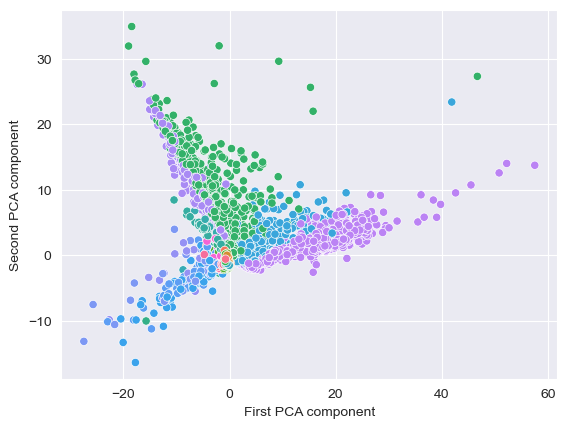

In [160]:
z = vae.calc_latent(X_test).cpu()
print(z)
pca_var = pca.fit_transform(z.cpu())
sns.scatterplot(x=pca_var[:,0], y=pca_var[:,1], hue=test_adata.obs['cell_type'], legend=False)
plt.xlabel('First PCA component')
plt.ylabel('Second PCA component')
plt.savefig('Plots/CustomVAE_PCA_10.pdf')

# Custom Decoder

In [152]:
class CustomDecoder(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, h_dim3, z_dim):
        super(CustomDecoder, self).__init__()
        self.lin5 = nn.Linear(z_dim, h_dim3)
        self.batch_norm5 = nn.BatchNorm1d(h_dim3)
        self.drop5 = nn.Dropout()
        self.lin6 = nn.Linear(h_dim3, h_dim2)
        self.drop6 = nn.Dropout()
        self.batch_norm6 = nn.BatchNorm1d(h_dim2)
        self.lin7 = nn.Linear(h_dim2, h_dim1)
        self.drop7 = nn.Dropout()
        self.batch_norm7 = nn.BatchNorm1d(h_dim1)
        self.lin8 = nn.Linear(h_dim1, x_dim)

    @staticmethod
    def log_prob(x, p):
        dist = torch.distributions.poisson.Poisson(p + 1e-4)
        log_prob_tensor = dist.log_prob(x)
        log_prob_sum = torch.sum(log_prob_tensor)
        return log_prob_sum

    def forward(self, z):
        h = self.drop5(self.batch_norm5(self.lin5(z)))
        h = nn.functional.relu(h)
        h = self.drop6(self.batch_norm6(self.lin6(h)))
        h = nn.functional.relu(h)
        h = self.drop7(self.batch_norm7(self.lin7(h)))
        h = nn.functional.relu(h)
        return nn.functional.relu(self.lin8(h))

In [153]:
device = torch.device("cpu")

X_test = torch.Tensor(test_adata.layers['counts'].toarray()).to(device)
X_train = torch.Tensor(train_adata.layers['counts'].toarray()).to(device)

n_epochs = 50 # or whatever
batch_size = 512 # or whatever
beta = 1

encoder = Encoder(5000, 2000, 1500, 1000, 10).to(device)
decoder = CustomDecoder(5000, 2000, 1500, 1000, 10).to(device)
vae = VAE(encoder, decoder).to(device)

optimizer = torch.optim.AdamW(params=vae.parameters())
train_loss_list = []
train_kl_loss_list = []
train_recon_loss_list = []
test_loss_list = []
test_kl_loss_list = []
test_recon_loss_list = []

for epoch in range(n_epochs):
    train_loss, train_kl_loss, train_recon_loss = train(X_train, vae, batch_size, beta)
    train_loss_list.append(train_loss)
    train_kl_loss_list.append(train_kl_loss)
    train_recon_loss_list.append(train_recon_loss)
    test_loss, test_kl_loss, test_recon_loss = test(X_test, vae, beta)
    test_loss_list.append(test_loss)
    test_kl_loss_list.append(test_kl_loss)
    test_recon_loss_list.append(test_recon_loss)


100%|██████████| 142/142 [00:24<00:00,  5.75it/s]


====> Epoch: 0 Average train loss: 6742.884189760397
====> Epoch: 0 Average test loss: 5439.28955078125


100%|██████████| 142/142 [00:23<00:00,  5.95it/s]


====> Epoch: 1 Average train loss: 5276.783052843002
====> Epoch: 1 Average test loss: 4954.6318359375


100%|██████████| 142/142 [00:25<00:00,  5.51it/s]


====> Epoch: 2 Average train loss: 4770.762026887603
====> Epoch: 2 Average test loss: 4546.6572265625


100%|██████████| 142/142 [00:23<00:00,  6.02it/s]


====> Epoch: 3 Average train loss: 4461.042322775437
====> Epoch: 3 Average test loss: 4203.783203125


100%|██████████| 142/142 [00:23<00:00,  6.13it/s]


====> Epoch: 4 Average train loss: 4217.899886980148
====> Epoch: 4 Average test loss: 4063.208984375


100%|██████████| 142/142 [00:23<00:00,  6.11it/s]


====> Epoch: 5 Average train loss: 4043.918632522539
====> Epoch: 5 Average test loss: 3903.090087890625


100%|██████████| 142/142 [00:23<00:00,  6.06it/s]


====> Epoch: 6 Average train loss: 3890.627261370797
====> Epoch: 6 Average test loss: 3703.65576171875


100%|██████████| 142/142 [00:25<00:00,  5.58it/s]


====> Epoch: 7 Average train loss: 3786.572591181898
====> Epoch: 7 Average test loss: 3596.57666015625


100%|██████████| 142/142 [00:23<00:00,  5.96it/s]


====> Epoch: 8 Average train loss: 3686.425378225924
====> Epoch: 8 Average test loss: 3444.0888671875


100%|██████████| 142/142 [00:22<00:00,  6.39it/s]


====> Epoch: 9 Average train loss: 3587.85756517846
====> Epoch: 9 Average test loss: 3431.6220703125


100%|██████████| 142/142 [00:22<00:00,  6.43it/s]


====> Epoch: 10 Average train loss: 3558.5437716605156
====> Epoch: 10 Average test loss: 3451.72119140625


100%|██████████| 142/142 [00:22<00:00,  6.45it/s]


====> Epoch: 11 Average train loss: 3458.41348869109
====> Epoch: 11 Average test loss: 3205.7275390625


100%|██████████| 142/142 [00:21<00:00,  6.47it/s]


====> Epoch: 12 Average train loss: 3389.536927229756
====> Epoch: 12 Average test loss: 3241.01513671875


100%|██████████| 142/142 [00:22<00:00,  6.44it/s]


====> Epoch: 13 Average train loss: 3332.0558773136286
====> Epoch: 13 Average test loss: 3165.68798828125


100%|██████████| 142/142 [00:22<00:00,  6.39it/s]


====> Epoch: 14 Average train loss: 3295.950694683674
====> Epoch: 14 Average test loss: 3155.0810546875


100%|██████████| 142/142 [00:22<00:00,  6.43it/s]


====> Epoch: 15 Average train loss: 3232.3066190943177
====> Epoch: 15 Average test loss: 3057.9716796875


100%|██████████| 142/142 [00:22<00:00,  6.44it/s]


====> Epoch: 16 Average train loss: 3193.130123328613
====> Epoch: 16 Average test loss: 3018.07275390625


100%|██████████| 142/142 [00:23<00:00,  6.10it/s]


====> Epoch: 17 Average train loss: 3131.307958757167
====> Epoch: 17 Average test loss: 2987.382568359375


100%|██████████| 142/142 [00:24<00:00,  5.79it/s]


====> Epoch: 18 Average train loss: 3106.3068722691737
====> Epoch: 18 Average test loss: 2968.14794921875


100%|██████████| 142/142 [00:26<00:00,  5.36it/s]


====> Epoch: 19 Average train loss: 3091.8558759936573
====> Epoch: 19 Average test loss: 2952.95947265625


100%|██████████| 142/142 [00:23<00:00,  6.15it/s]


====> Epoch: 20 Average train loss: 3031.6428787430928
====> Epoch: 20 Average test loss: 2909.691650390625


100%|██████████| 142/142 [00:23<00:00,  6.00it/s]


====> Epoch: 21 Average train loss: 3013.8518102110397
====> Epoch: 21 Average test loss: 2864.427978515625


100%|██████████| 142/142 [00:22<00:00,  6.18it/s]


====> Epoch: 22 Average train loss: 2970.17332848334
====> Epoch: 22 Average test loss: 2828.669189453125


100%|██████████| 142/142 [00:22<00:00,  6.28it/s]


====> Epoch: 23 Average train loss: 2950.1679891987383
====> Epoch: 23 Average test loss: 2813.033935546875


100%|██████████| 142/142 [00:23<00:00,  6.17it/s]


====> Epoch: 24 Average train loss: 2936.5485363247494
====> Epoch: 24 Average test loss: 2739.7978515625


100%|██████████| 142/142 [00:23<00:00,  6.12it/s]


====> Epoch: 25 Average train loss: 2943.2320359997334
====> Epoch: 25 Average test loss: 2741.15576171875


100%|██████████| 142/142 [00:23<00:00,  6.16it/s]


====> Epoch: 26 Average train loss: 2896.997838600813
====> Epoch: 26 Average test loss: 2747.6630859375


100%|██████████| 142/142 [00:22<00:00,  6.30it/s]


====> Epoch: 27 Average train loss: 2879.1627034162593
====> Epoch: 27 Average test loss: 2710.417236328125


100%|██████████| 142/142 [00:22<00:00,  6.34it/s]


====> Epoch: 28 Average train loss: 2854.1970696849726
====> Epoch: 28 Average test loss: 2741.353515625


100%|██████████| 142/142 [00:22<00:00,  6.35it/s]


====> Epoch: 29 Average train loss: 2837.1500768612896
====> Epoch: 29 Average test loss: 2712.1005859375


100%|██████████| 142/142 [00:22<00:00,  6.20it/s]


====> Epoch: 30 Average train loss: 2831.081561632281
====> Epoch: 30 Average test loss: 2706.149169921875


100%|██████████| 142/142 [00:23<00:00,  6.11it/s]


====> Epoch: 31 Average train loss: 2811.2620653507056
====> Epoch: 31 Average test loss: 2669.30908203125


100%|██████████| 142/142 [00:23<00:00,  6.06it/s]


====> Epoch: 32 Average train loss: 2821.2571262230294
====> Epoch: 32 Average test loss: 2722.292236328125


100%|██████████| 142/142 [00:22<00:00,  6.26it/s]


====> Epoch: 33 Average train loss: 2805.429675057646
====> Epoch: 33 Average test loss: 2635.106201171875


100%|██████████| 142/142 [00:22<00:00,  6.34it/s]


====> Epoch: 34 Average train loss: 2764.285631331535
====> Epoch: 34 Average test loss: 2605.7958984375


100%|██████████| 142/142 [00:22<00:00,  6.29it/s]


====> Epoch: 35 Average train loss: 2748.0964460958276
====> Epoch: 35 Average test loss: 2585.670166015625


100%|██████████| 142/142 [00:27<00:00,  5.12it/s]


====> Epoch: 36 Average train loss: 2730.8541026336243
====> Epoch: 36 Average test loss: 2582.88134765625


100%|██████████| 142/142 [00:24<00:00,  5.81it/s]


====> Epoch: 37 Average train loss: 2721.2341235021568
====> Epoch: 37 Average test loss: 2572.206787109375


100%|██████████| 142/142 [00:24<00:00,  5.70it/s]


====> Epoch: 38 Average train loss: 2743.123324123106
====> Epoch: 38 Average test loss: 2604.69189453125


100%|██████████| 142/142 [00:23<00:00,  6.09it/s]


====> Epoch: 39 Average train loss: 2703.185719769624
====> Epoch: 39 Average test loss: 2574.873291015625


100%|██████████| 142/142 [00:23<00:00,  6.06it/s]


====> Epoch: 40 Average train loss: 2691.381801153006
====> Epoch: 40 Average test loss: 2547.219482421875


100%|██████████| 142/142 [00:22<00:00,  6.32it/s]


====> Epoch: 41 Average train loss: 2682.1447817199964
====> Epoch: 41 Average test loss: 2525.791015625


100%|██████████| 142/142 [00:22<00:00,  6.41it/s]


====> Epoch: 42 Average train loss: 2664.834190377105
====> Epoch: 42 Average test loss: 2539.28662109375


100%|██████████| 142/142 [00:26<00:00,  5.35it/s]


====> Epoch: 43 Average train loss: 2749.7543166312944
====> Epoch: 43 Average test loss: 2596.03271484375


100%|██████████| 142/142 [00:22<00:00,  6.25it/s]


====> Epoch: 44 Average train loss: 2722.45309649078
====> Epoch: 44 Average test loss: 2542.63916015625


100%|██████████| 142/142 [00:22<00:00,  6.34it/s]


====> Epoch: 45 Average train loss: 2680.487509499467
====> Epoch: 45 Average test loss: 2538.60009765625


100%|██████████| 142/142 [00:22<00:00,  6.45it/s]


====> Epoch: 46 Average train loss: 2649.325023824403
====> Epoch: 46 Average test loss: 2528.073974609375


100%|██████████| 142/142 [00:22<00:00,  6.43it/s]


====> Epoch: 47 Average train loss: 2670.259901246659
====> Epoch: 47 Average test loss: 2507.9638671875


100%|██████████| 142/142 [00:22<00:00,  6.44it/s]


====> Epoch: 48 Average train loss: 2644.5701040635213
====> Epoch: 48 Average test loss: 2496.2822265625


100%|██████████| 142/142 [00:22<00:00,  6.43it/s]


====> Epoch: 49 Average train loss: 2632.813933575573
====> Epoch: 49 Average test loss: 2480.220947265625


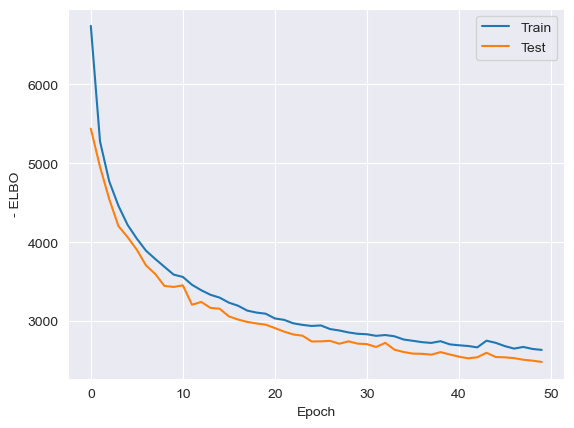

In [158]:
plt.plot(train_loss_list, label='Train')
plt.plot(test_loss_list, label='Test')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('- ELBO')
plt.savefig("Plots/CustomVAE_10.pdf")

<AxesSubplot:>

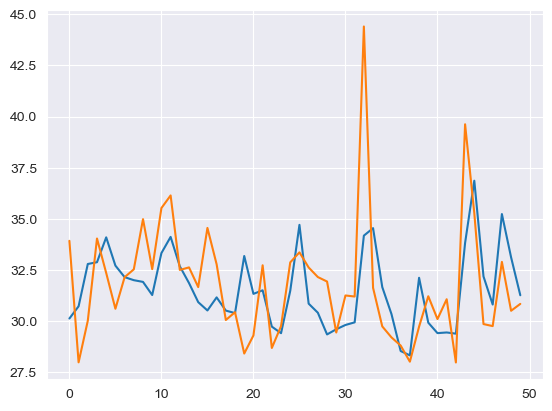

In [155]:
sns.lineplot(train_kl_loss_list)
sns.lineplot(test_kl_loss_list)

<AxesSubplot:>

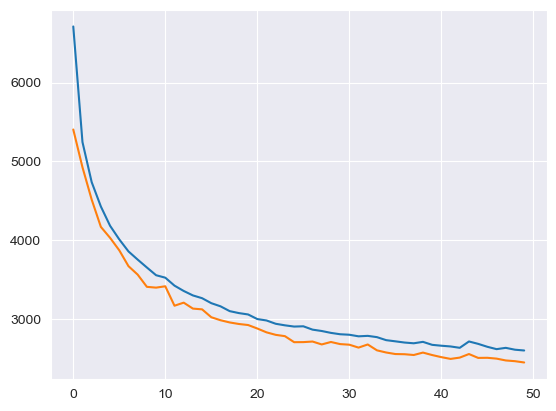

In [156]:
sns.lineplot(train_recon_loss_list)
sns.lineplot(test_recon_loss_list)

[6.45428855e-01 1.58946619e-01 4.65350852e-02 4.03427497e-02
 9.74884185e-03 7.56985502e-03 4.63788088e-03 4.35644756e-03
 4.14857675e-03 4.03355001e-03 3.91780483e-03 3.51370183e-03
 3.32525941e-03 3.26063609e-03 3.24111384e-03 3.14709771e-03
 3.06235862e-03 2.87629827e-03 2.79002991e-03 2.74950260e-03
 2.68949754e-03 2.50144428e-03 2.42600037e-03 2.33941354e-03
 2.28788575e-03 2.19131852e-03 2.03574919e-03 1.92349500e-03
 1.87615357e-03 1.75409678e-03 1.69459640e-03 1.56698218e-03
 1.45093390e-03 1.38038603e-03 1.31151868e-03 1.20217362e-03
 1.11877084e-03 1.09781131e-03 1.03217830e-03 9.92664254e-04
 9.61240810e-04 9.52771861e-04 8.79061742e-04 8.16532305e-04
 7.99671508e-04 7.84056059e-04 6.66014484e-04 6.49844039e-04
 5.35328947e-04 4.50143969e-04]


<AxesSubplot:>

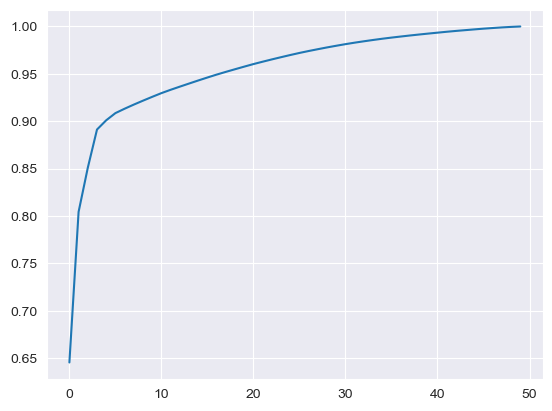

In [134]:
from sklearn.decomposition import PCA
z = vae.calc_latent(X_test)
pca = PCA()
pca.fit(z.cpu())
variance = pca.explained_variance_ratio_
combined_variance = np.zeros_like(variance)
combined_variance[0] = variance[0]
for i in range(1, len(variance)):
    combined_variance[i] = combined_variance[i-1] + variance[i]

print(variance)
sns.lineplot(combined_variance)